===================================================================================================================================================================================================

Graded Challenge 2

Nama  : Abraham Rashid Haikal

Batch : HCK-018

Notebook ini dibuat untuk melakukan penelitian terhadap obesitas dengan visualisasi data dan analisis statistika deskriptif dan inferensial.

link Tableau: [text](https://public.tableau.com/views/AnalisisObesitas/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

===================================================================================================================================================================================================


# I. Identifikasi Masalah

## Latar Belakang

Obesitas adalah masalah kesehatan yang dapat mengarah ke komplikasi gangguan kesehatan lain yang sering kali mematikan. obesitas dapat menurunkan angka harapan hidup seseorang dengan drastis. pencegahan dan penanganan obesitas dimulai dari kesadaran individu. maka dari itu masyarakat perlu di edukasi tentang faktor-faktor penyebab obesitas.

## Kerangka kerja SMART

S: Menurunkan persentase obesitas di Mexico

M: Persentase obesitas turun sebesar 10%

A: Edukasi faktor penyebab obesitas pada masyarakat

R: Masyarakat teredukasi tentang faktor penyebab obesitas sehingga tidak obesitas

T: Menurunkan persentase obesitas di Mexico di tahun depan

Problem statement: Menurunkan angka obesitas pada masyarakat dengan edukasi tentang faktor penyebabnya agar tercapai penurunan persentase obesitas sebesar 10 % dalam 1 tahun

Penjabaran masalah
1. Seberapa tinggi angka obesitas di masyarakat saat ini?
2. Bagaimana perbandingan angka obesitas laki-laki dan perempuan?
3. Bagaimana kebiasaan makan seseorang berdasarkan tingkat obesitasnya?
4. Bagaimana kebiasaan aktivitas fisik seseorang berdasarkan tingkat obesitasnya?
5. Faktor apa yang paling berpengaruh terhadap indeks massa tubuh seseorang?
6. Apakah kebiasaan merokok, konsumsi alkohol dan sejarah obesitas keluarga berpengaruh terhadap obesitas seseorang?

# II. Load Data

In [1]:
#import libraries
import pandas as pd
import plotly.express as px
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
#Load dataframe
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Dataframe terdiri dari 17 kolom dan 2111 baris.

In [3]:
# menunjukkan informasi data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Semua kolom mempunyai 2111 kolom yang bukan null dengan tipe data object dan float.

# III. Data Cleaning

Berdasarkan dokumentasi dari sumber data, diketahui bahwa:

<ul type="none">
    <li>FAVC        : Frequensi makanan tinggi kalori</li>
    <li>FCVC        : Frequensi makanan sayuran</li>
    <li>NCP     : Jumlah makan utama</li>
    <li>CAEC        : Jumlah makan selingan</li>
    <li>SMOKE    : Status perokok</li>
    <li>CH2O    : Konsumsi air perhari</li>
    <li>SCC    : Status perhitungan kalori</li>
    <li>FAF    : Frekuensi aktivitas fisik</li>
    <li>TUE    : Lama penggunaan alat elektronik</li>
    <li>CALC    : Konsimsi alkohol</li>
    <li>MTRANS    : Konsimsi alkohol</li>
    <li>NObeyesdad    : Status obesitas</li>
</ul>

dengan FAVC, FCVC, NCP, CAEC, CALC, SMOKE dan CH2O adalah faktor yang menyangkut kebiasaan makan dan SCC, FAF, TUE dan MTRANS adalah faktor yang menyangkut kebiasaan fisik.

Selanjutnya, dilakukan pengecekan missing value.












In [4]:
# menghitung jumlah missing value setiap kolom
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Tidak ditemukan adanya missing value pada dataframe.

# IV. Analisis dan Perhitungan

Sebelum memulai analisis, saya memutuskan untuk menambahkan 1 kolom lagi yang berisikan BMI yang didapatkan dengan rumus yang digunakan dalam dokumentasi data untuk pengkategorian tingkat obesitas yaitu $\frac{Weight}{Height * Height}$ untuk memudahkan perhitungan korelasi antara kolom-kolom faktor yang dapat mempengaruhi obesitas dengan tingkat obesitas.

In [5]:
df_bmi = df.copy()
df_bmi['BMI'] = df_bmi['Weight'] / (df_bmi['Height'] * df_bmi['Height'])
df_bmi.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


## 1. Seberapa tinggi angka obesitas berdasarkan populasi survey

Dalam dataframe, obesitas dibagi menjadi 3. Untuk memfokuskan perhitungan angka obesitas, 3 kategori obesitas digabung menjadi 1.

In [6]:
# membuat variabel berisi kategori obesitas
obese = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# membuat wadah untuk menampung kategori obesitas
obesity = []

# memasukkan kategori obesitas ke wadah
for x in df_bmi['NObeyesdad']:
    if x in obese:
        obesity.append('Obese')
    else:
        obesity.append(x)
        
# membuat kolom baru berisi kategori obesitas
df_bmi['Obesity'] = obesity

In [7]:
df_value_counts = df_bmi['Obesity'].value_counts().sort_index()

# Create the bar chart using plotly express
fig = px.bar(df_value_counts, 
             x=df_value_counts.index,  # Set index as x-axis
             y=df_value_counts.values,  # Set values as y-axis
             text_auto= True,
             labels={'y':'Jumlah', 'Obesity': 'Kategori BMI'},
             title="Distribusi Obesitas")
fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)
             

Berdasarkan grafik diatas didapatkan bahwa jumlah penderita obesitas pada survey adalah sebanyak 972 orang, jauh lebih tinggi dari jumlah orang dengan BMI normal yang hanya berjumlah 287 orang, dan kategori obesitas terkecil pada survey adalah Insufficient Weight atau Kurang berat badan sebanyak 272 orang.

## 2. Perbandingan obesitas pada laki-laki dan perempuan

### Menghitung jumlah penderita obesitas dikelompokkan berdasarkan gender

In [8]:
# membuat dataframe baru dengan filter kolom NObeyesdad berisi kata Obesity
df_obese = df[df['NObeyesdad'].str.contains('Obesity')]

In [9]:
# membuat variabel berisikan gender dan jumlahnya dari dataframe df_obese
df_value_counts = df_obese['Gender'].value_counts().sort_index()

In [10]:
df_value_counts

Gender
Female    481
Male      491
Name: count, dtype: int64

In [11]:
# menampilkan pie chart
fig = px.pie(df_obese, values=df_value_counts.values, names=df_value_counts.index,
title="Distribusi Obesitas Berdasarkan Gender")
fig.show()

Berdasarkan grafik diatas dapat dilihat bahwa penderita obesitas pada survey berdasarkan gendernya hampir terbagi dua dengan persentase penderita laki-laki sedikit lebih banyak sebesar 50.5% dibandingkan penderita perempuan sebesar 49.5%

## 3. Bagaimana kebiasaan makan orang berdasarkan tingkat obesitasnya?

### a. Kecenderungan makan cemilan berdasarkan kategori berat badan

In [12]:
# membuat dataframe yang sudah diurutkan berdasarkan Kolom NObeyesdad
df_sorted = df.sort_values(by='NObeyesdad', ascending=True)

In [13]:
df_sorted['BMI'] = df_sorted['Weight'] / (df_sorted['Height'] * df_sorted['Height'])

In [14]:
# membuat histogram grup berdasarkan kategori obesitas dan kecenderungan makan cemilan
fig = px.histogram(df_sorted, x='NObeyesdad', y='CAEC',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Konsumsi Cemilan Berdasarkan Kategori BMI",
                   color= 'CAEC', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, semua kategori obesitas terkadang makan cemilan diantara makan utama. Hal yang menarik disini adalah orang dengan kategori berat badang kurang lebih sering makan cemilan diantara makan utama dibandingkan kategori lainnya.

### b. Kecenderungan konsumsi tinggi kalori berdasarkan kategori berat badan

In [15]:
# membuat histogram grup berdasarkan kategori obesitas dan kecenderungan konsumsi makanan tinggi kalori
fig = px.histogram(df_sorted, x='NObeyesdad', y='FAVC',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Konsumsi Tinggi Kalori Berdasarkan Kategori BMI",
             color= 'FAVC', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, semua kategori obesitas memakan makanan tinggi kalori. Hal yang menarik disini adalah orang dengan kategori berat badang kurang lebih sering makan cemilan diantara makan utama dibandingkan kategori lainnya.

### c. Porsi sayuran dalam makanan berdasarkan kategori berat badan

In [16]:
# mengubah tipe data kolom FCVC menjadi int
df_sorted['FCVC'] = df_sorted['FCVC'].astype(int)

In [17]:
# membuat histogram grup berdasarkan kategori obesitas dan porsi sayuran dalam makanan
fig = px.histogram(df_sorted, x='NObeyesdad', y='FCVC',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Konsumsi Sayur Berdasarkan Kategori BMI",
             color= 'FCVC', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, kebanyakan orang dalam setiap kategori terkadang memasukkan sayur ke porsi makan mereka, kecuali pada kategori Obesity Type III yang semua selalu memasukkan sayur ke porsi makan mereka.

### d. Jumlah makanan utama dalam sehari berdasarkan kategori berat badan

In [18]:
# mengubah tipe data kolom NCP menjadi int
df_sorted['NCP'] = df_sorted['NCP'].astype(int)

In [19]:
# membuat histogram grup berdasarkan kategori obesitas dan jumlah  makan utama sehari-hari
fig = px.histogram(df_sorted, x='NObeyesdad', y='NCP',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Jumlah Makanan Sehari Berdasarkan Kategori BMI",
             color= 'NCP', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, semua kategori cenderung makan 3 kali sehari.

### e. Konsumsi air sehari berdasarkan kategori berat badan.

In [20]:
# mengubah tipe data kolom CH2O menjadi int
df_sorted['CH2O'] = df_sorted['CH2O'].astype(int)

In [21]:
# membuat histogram grup berdasarkan kategori obesitas dan konsumsi air harian
fig = px.histogram(df_sorted, x='NObeyesdad', y='CH2O',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Konsumsi Air Berdasarkan Kategori BMI",
             color= 'CH2O', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, mayoritas orang dalam semua kategori berat badan minum air sebanyak 1-2 liter tiap harinya.

### f. Frekuensi konsumsi alkohol berdasarkan kategori berat badan

In [22]:
# membuat histogram grup berdasarkan kategori obesitas dan konsumsi air harian
fig = px.histogram(df_sorted, x='NObeyesdad', y='CALC',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Konsumsi Alkohol Berdasarkan Kategori BMI",
             color= 'CALC', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, mayoritas orang di seluruh kategori berat badan kadang mengkonsumsi alkohol.

## 4. Bagaimana kebiasaan aktivitas fisik orang berdasarkan tingkat obesitasnya?

### a. Monitor pemasukan kalori berdasarkan kategori berat badan

In [23]:
# membuat histogram grup berdasarkan kategori obesitas dan monitor pemasukkan kalori
fig = px.histogram(df_sorted, x='NObeyesdad', y='SCC',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Monitor Kalori Berdasarkan Kategori BMI",
             color= 'SCC', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, mayoritas besar orang dari semua kategori obesitas tidak memperhatikan pemasukan kalori harian mereka.

### b. Aktivitas fisik mingguan berdasarkan kategori berat badan

In [24]:
# mengubah tipe data kolom FAF menjadi int
df_sorted['FAF'] = df_sorted['FAF'].astype(int)

In [25]:
fig = px.histogram(df_sorted, x='NObeyesdad', y='FAF',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Frekuensi Aktivitas Fisik Berdasarkan Kategori BMI",
             color= 'FAF', barmode='group', histfunc='count', text_auto=True)

fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, kebanyakan kategori tidak melakukan aktivitas fisik sama sekali setiap minggunya, kecuali kategori berat badan normal yang kebanyakan orang dalam kategori tersebut setidaknya beraktivitas fisik sehari dalam seminggu.

### c. Moda transportasi berdasarkan kategori berat badan

In [26]:
# membuat histogram grup berdasarkan kategori obesitas pilihan moda transportasi
fig = px.histogram(df_sorted, x='NObeyesdad', y='MTRANS',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Pilihan Transportasi Berdasarkan Kategori BMI",
             color='MTRANS', barmode='group',histfunc='count', text_auto=True)
fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas seluruh kategori berat badan cenderung memilih untuk naik transportasi umum dibanding moda transportasi lainya, namun orang dengan berat badan normal lebih banyak yang memilih berjalan kaki dibanding orang dengan kategori berat badan lain.

### d. Lama penggunaan alat elektronik berdasarkan kategori berat badan.

In [27]:
# mengubah tipe data kolom TUE menjadi int
df_sorted['TUE'] = df_sorted['TUE'].astype(int)

In [28]:
# membuat histogram grup berdasarkan kategori obesitas dengan lama penggunaan alat elektronik
fig = px.histogram(df_sorted, x='NObeyesdad', y='TUE',
                   labels={'count':'Jumlah', 'NObeyesdad': 'Kategori BMI'},
                   title="Lama Penggunaan Alat Elektronik Berdasarkan Kategori BMI",
             color='TUE', barmode='group',histfunc='count', text_auto=True)
fig.update_layout(yaxis_tickformat='', yaxis_showticklabels=False)

Berdasarkan grafik diatas, kebanyakan orang menggunakan alat elektronik 0-2 jam setiap harinya, dengan orang dalam kategori berat badan normal memiliki proporsi kelompok yang menggunakan alat elektronik 3-5 jam lebih banyak dari kategori berat badan lainnya.

## 5. Faktor apa yang paling berpengaruh dengan indeks massa tubuh?

<Axes: >

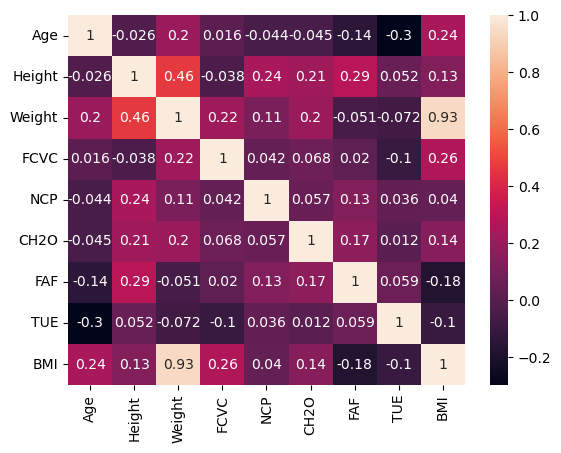

In [29]:
data_numeric1 = df_bmi.select_dtypes(include=np.number)

# Create the heatmap using the correlation matrix of numerical data
corr_matrix = data_numeric1.corr()
sns.heatmap(corr_matrix, annot=True)

Berdasarkan heatmap, Faktor kebiasaan makan yang paling berpengaruh adalah FCVC atau frekuensi konsumsi sayuran dengan faktor korelasi sebesar 0.26. Nilai faktor positif menunjukkan bahwa semakin tinggi frekuensi makan sayur seseorang maka indeks massa tubuhnya akan semakin tinggi. nilai faktor yang kecil menunjukkan bahwa pengaruhnya tidak terlalu kuat. Faktor kebiasaan fisik yang paling mempengaruhi adalah frekuensi kegiatan fisik. Faktor negatif menunjukkan bahwa semakin kecil frekuensi kegiatan fisik maka indeks massa tubuh akan semakin tinggi.

## 6. Apakah kebiasaan merokok, konsumsi alkohol, dan sejarah obesitas dalam keluarga berpengaruh terhadap obesitas?

Untuk mengecek korelasi antara merokok dan minum alkohol dengan obesitas data dikategorikan berdasarkan obesitas menjadi ya dan tidak.

In [30]:
# daftar kategori obesitas
obeseyn = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# membuat wadah untuk menampung kategori obesitas
obesityyn = []

# memasukkan kategori obesitas ke wadah
for x in df_bmi['NObeyesdad']:
    if x in obeseyn:
        obesityyn.append('yes')
    else:
        obesityyn.append('no')

# membuat kolom baru berisi kategori obesitas
df_bmi['ObesityYN'] = obesityyn

## a. Hubungan antara merokok dengan obesitas

H0 = Tidak ada hubungan antara merokok dengan obesitas

H1 = Merokok dan obesitas memiliki hubungan

In [31]:
# membuat tabel frekuensi kombinasi kategori SMOKE dan ObesityYN
contingency_table1 = pd.crosstab(df_bmi['SMOKE'],df_bmi['ObesityYN'])
contingency_table1

ObesityYN,no,yes
SMOKE,,
no,1117,950
yes,22,22


In [32]:
res = stats.chi2_contingency(contingency_table1)
print("P-value:",res.pvalue)

P-value: 0.7045803269633515


p-value > critical value, H0 diterima. Tidak ada hubungan antara merokok dengan obesitas.

## b. Hubungan antara konsumsi alkohol dengan obesitas

H0 = Tidak ada hubungan antara minum alkohol dengan obesitas

H1 = Minum alkohol dan obesitas memiliki hubungan

In [33]:
# membuat tabel frekuensi kombinasi kategori CALC dan ObesityYN
contingency_table2 = pd.crosstab(df_bmi['CALC'],df_bmi['ObesityYN'])
contingency_table2

ObesityYN,no,yes
CALC,,
Always,1,0
Frequently,54,16
Sometimes,682,719
no,402,237


In [34]:
res = stats.chi2_contingency(contingency_table2)
print("P-value:",res.pvalue)

P-value: 2.5502998069199592e-11


p-value > critical value, H0 ditolak. Meminum minuman beralkohol memiliki hubungan dengan obesitas.

### c. Hubungan antara sejarah obesitas dalam keluarga dengan obesitas seseorang

H0 = Tidak ada hubungan antara sejarah obesitas dalam keluarga dengan obesitas seseorang

H1 = Sejarah obesitas dan obesitas seseorang memiliki hubungan

In [35]:
# membuat tabel frekuensi kombinasi sejarah obesitas dan ObesityYN
contingency_table3 = pd.crosstab(df_bmi['family_history_with_overweight'],df_bmi['ObesityYN'])
contingency_table3

ObesityYN,no,yes
family_history_with_overweight,,
no,377,8
yes,762,964


In [36]:
res = stats.chi2_contingency(contingency_table3)
print("P-value:",res.pvalue)

P-value: 3.3835681113566e-81


p-value > critical value, H0 ditolak. Sejarah obesitas dalam keluarga berhubungan dengan obesitas seseorang.

# V. Kesimpulan

Berdasarkan penelitian yang dilakukan, ditemukan bahwa 972 dari 2111 peserta survey mengalami obesitas. Obesitas dapat dialami oleh laki-laki dan perempuan dengan peluang yang kurang lebih sama. Berdasarkan kebiasaan makan, hampir tidak ditemukan perbedaan antar kategori berat badan kecuali di bagian frekuensi sayuran dimana orang dengan tingkat obesitas tipe III lebih sering makan sayuran dibanding orang di kategori lainnya. Berdasarkan kebiasaan aktivitas fisik, hampir tidak ditemukan perbedaan antara kategori berat badan seseorang dengan kegiatan fisiknya, kecuali pada frekuensi kegiatan fisik mingguan dimana orang dengan kategori berat badan normal lebih banyak yang setidaknya melakukan kegiatan fisik sehari dalam seminggu. Selain itu, orang dengan kategori berat badan normal juga lebih banyak yang memilih untuk berjalan kaki dibanding orang di kategori berat badan lainnya. Faktor kebiasaan makan yang paling berpengaruh terhadap tingkat obesitas seseorang adalah frekuensi makan sayur dimana semakin sering seseorang makan sayur maka tingkat obesitasnya akan semakin tinggi. Faktor kegiatan yang paling berpengaruh adalah frekuensi kegiatan fisik mingguan dimana semakin sering orang melakukan kegiatan fisik maka tingkat obesitasnya akan turun. Menurut analisis chi-square, kebiasaan merokok tidak memiliki pengaruh terhadap obesitas seseorang namun kebiasaan minum alkohol dan sejarah obesitas dalam keluarga memiliki pengaruh dengan tingkat obesitas seseorang. Berdasarkan analisa yang dilakukan, saya menyarankan untuk penyuluhan peningkatan aktivitas masyarakat dan mengurangi konsumsi sayur dan edukasi peningkatan resiko obesitas bagi orang yang mengkonsumsi alkohol secara reguler dan orang denga sejarah obesitas di keluarganya.

# VI. Export data untuk pengolahan di Tableau

In [37]:
# menambahkan kolom Obesity ke dataframe df_sorted
obese = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# membuat wadah untuk menampung kategori obesitas
obesity = []

# memasukkan kategori obesitas ke wadah
for x in df_sorted['NObeyesdad']:
    if x in obese:
        obesity.append('Obese')
    else:
        obesity.append(x)
        
# membuat kolom baru berisi kategori obesitas
df_sorted['Obesity'] = obesity

In [38]:
# export dataframe sebagai csv
df_sorted.to_csv('obesity_sorted.csv')